In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures, LabelEncoder

# Import relevant sklearn classes related to machine learning models
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, ElasticNet
from sklearn.svm import SVC, SVR, NuSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

# Import relevant sklearn class/function related to evaluation
import sklearn.metrics
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv("../data/UCSFFSX51_11_08_19.csv")
dictio = pd.read_csv("../data/UCSFFSX51_DICT_08_01_14.csv")

In [4]:
data.describe()

,RID,LONISID,LONIUID,IMAGEUID,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,...,ST146HS,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV
count,4896.000000,4807.000000,4807.000000,4.896000e+03,4896.000000,4896.000000,4896.000000,4896.000000,4896.00000,4896.000000,...,4891.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4.884000e+03
mean,3897.401757,51793.403578,173930.608488,3.646904e+05,1431.421364,3517.939338,1448.141136,2.260992,0.60526,1938.381332,...,318.280417,205808.821458,206820.205364,412629.028665,226661.696970,227940.023956,454601.709664,167007.303440,579636.332719,9.887242e+05
std,1204.447763,15059.230703,66430.570562,1.319512e+05,201.202877,564.442255,206.356276,0.173970,0.06199,346.493735,...,62.568910,21984.772402,22196.501463,43828.759585,29757.397287,29916.563542,59442.880488,15323.265903,55343.668009,1.050099e+05
min,21.000000,24831.000000,79478.000000,2.219590e+05,506.000000,1975.000000,978.000000,1.592000,0.42200,699.000000,...,3.440190,118569.000000,123321.000000,247294.000000,124111.000000,25546.000000,227798.000000,116668.000000,363962.000000,6.350980e+05
25%,2407.000000,40514.000000,132182.500000,2.806175e+05,1298.000000,3122.000000,1301.000000,2.150000,0.56100,1712.000000,...,276.759000,191280.750000,192220.750000,383780.750000,206182.250000,207707.000000,413864.000000,156767.750000,542560.500000,9.147080e+05
50%,4341.500000,52326.000000,167545.000000,3.424170e+05,1417.000000,3491.000000,1433.000000,2.266000,0.59900,1931.000000,...,318.001000,205809.000000,206800.500000,412582.000000,225543.000000,227000.500000,452613.000000,166268.500000,580349.500000,9.858045e+05
75%,4718.000000,60269.000000,197273.500000,4.019455e+05,1556.000000,3864.000000,1574.000000,2.375000,0.64300,2158.000000,...,359.340000,220363.000000,221630.000000,442023.500000,244904.750000,246343.250000,490641.250000,177732.500000,614978.500000,1.058918e+06
max,5296.000000,107491.000000,531719.000000,1.051225e+06,2538.000000,7965.000000,4143.000000,3.213000,0.92600,3892.000000,...,537.036000,279616.000000,284310.000000,559892.000000,350784.000000,350209.000000,700367.000000,223265.000000,773898.000000,1.394760e+06


In [5]:
dict.describe()

,ID,QUESTION,STATUS,DEPRULE,LENGTH,DECIML,RANGEVAL,RANGESQL,RANGEPRL,OBJID,...,TAB,DE,MC,VISIBLE,LOGVISIBLE,MTBLNAME,SUBTBLNAME,POPJSCPT,GRID,DEF
count,364.0,364.0,364.0,364.0,344.000000,328.000000,3.0,364.0,364.0,364.0,...,364.0,364.0,344.000000,364.0,364.0,364.0,364.0,364.0,364.0,364.0
mean,-4.0,-4.0,-4.0,-4.0,8.386628,1.533537,-4.0,-4.0,-4.0,-4.0,...,-4.0,-4.0,-0.034884,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
std,0.0,0.0,0.0,0.0,10.275162,1.693332,0.0,0.0,0.0,0.0,...,0.0,0.0,0.372453,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.0,...,-4.0,-4.0,-4.000000,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
25%,-4.0,-4.0,-4.0,-4.0,4.000000,0.000000,-4.0,-4.0,-4.0,-4.0,...,-4.0,-4.0,0.000000,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
50%,-4.0,-4.0,-4.0,-4.0,5.000000,1.000000,-4.0,-4.0,-4.0,-4.0,...,-4.0,-4.0,0.000000,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
75%,-4.0,-4.0,-4.0,-4.0,10.000000,3.000000,-4.0,-4.0,-4.0,-4.0,...,-4.0,-4.0,0.000000,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
max,-4.0,-4.0,-4.0,-4.0,53.000000,8.000000,-4.0,-4.0,-4.0,-4.0,...,-4.0,-4.0,0.000000,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0


<AxesSubplot:xlabel='ST101SV'>

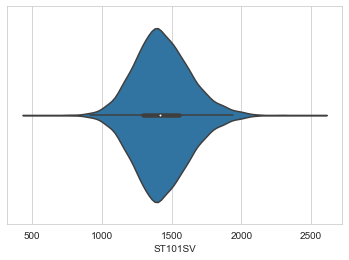

In [5]:
sns.violinplot(x=data["ST101SV"])

In [3]:
merge = pd.read_csv("../data/ADNIMERGE.csv", low_memory=False)

In [7]:
m1 = merge[merge["MMSE"]>=25]
m2 = merge[merge["MMSE"]<25]
print(len(m2))
len(m2[m2["DX_bl"] == "AD"]) /len(m2)

2255


0.4084257206208426

In [20]:
#len(merge['PTID'].unique())  #<
#len(merge.index)

In [8]:
new_df = pd.merge(merge, data, how='inner', left_on=["RID", "VISCODE"], right_on=["RID", "VISCODE2"])

In [ ]:
# AGE SEX APOE MMSE


In [9]:
new_df.describe()

,RID,SITE,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,FBB,CDRSB,...,ST146HS,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV
count,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,432.000000,0.0,888.000000,0.0,2674.000000,...,3636.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3.630000e+03
mean,3840.489011,77.434615,72.163022,16.258516,0.522527,1.222410,NaN,1.188046,NaN,1.663613,...,316.690923,205239.877961,206273.445730,411513.320661,226113.019008,227446.993664,453560.005510,166717.988981,578231.311846,9.870116e+05
std,1247.048018,126.283642,7.171073,2.647451,0.649297,0.158225,NaN,0.229132,NaN,2.240010,...,62.560715,22107.679254,22308.942553,44056.476763,29680.698364,29712.170176,59206.756867,15315.859178,55538.595986,1.047750e+05
min,21.000000,2.000000,55.000000,6.000000,0.000000,0.720336,NaN,0.809000,NaN,0.000000,...,24.899500,118569.000000,123321.000000,247294.000000,124111.000000,132309.000000,260123.000000,116668.000000,363962.000000,6.350980e+05
25%,2390.000000,21.000000,67.400000,14.000000,0.000000,1.123508,NaN,1.009250,NaN,0.000000,...,275.292250,190794.000000,191574.000000,382359.000000,205867.000000,207083.500000,412558.750000,156475.500000,541001.250000,9.130355e+05
50%,4327.000000,51.000000,72.100000,16.000000,0.000000,1.233205,NaN,1.093250,NaN,1.000000,...,316.684500,205142.000000,206171.500000,411363.500000,224900.500000,226497.500000,451614.500000,166100.500000,578869.500000,9.843185e+05
75%,4674.000000,114.000000,77.100000,18.000000,1.000000,1.339233,NaN,1.357825,NaN,2.500000,...,358.057750,219961.500000,221501.500000,441481.000000,244158.500000,245760.750000,489442.000000,177500.500000,614243.000000,1.056982e+06
max,5296.000000,941.000000,91.400000,20.000000,2.000000,1.651990,NaN,2.686600,NaN,17.000000,...,519.680000,277994.000000,284310.000000,559892.000000,347957.000000,348564.000000,696521.000000,223265.000000,773420.000000,1.394760e+06


In [10]:
merge['DX_bl'].unique()

array(['CN', 'AD', 'LMCI', 'SMC', 'EMCI', nan], dtype=object)

In [24]:
new_df.head()

,RID,COLPROT_x,ORIGPROT,PTID,SITE,VISCODE_x,EXAMDATE_x,DX_bl,AGE,PTGENDER,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,update_stamp_y
0,5280,ADNI2,ADNI2,100_S_5280,100,m24,2015-09-29,SMC,67.5,Male,...,221030.0,221527.0,442558.0,248677.0,252440.0,501117.0,184081.0,626638.0,1066610.0,2019-11-14 14:34:09.0
1,5277,ADNI2,ADNI2,027_S_5277,27,m24,2015-08-31,SMC,71.8,Female,...,197752.0,196422.0,394174.0,216028.0,215292.0,431320.0,152756.0,546930.0,920375.0,2019-11-14 14:34:09.0
2,5273,ADNI2,ADNI2,135_S_5273,135,m24,2015-08-26,SMC,90.1,Male,...,177569.0,180288.0,357856.0,201824.0,191831.0,393655.0,146660.0,504516.0,873134.0,2019-11-14 14:34:09.0
3,5269,ADNI2,ADNI2,135_S_5269,135,m24,2015-09-01,SMC,64.9,Male,...,222718.0,222068.0,444786.0,259290.0,256581.0,515871.0,180442.0,625228.0,1074190.0,2019-11-14 14:34:09.0
4,5265,ADNI2,ADNI2,007_S_5265,7,m24,2015-08-25,SMC,75.1,Female,...,201099.0,200764.0,401864.0,201117.0,206964.0,408081.0,167202.0,569066.0,944838.0,2019-11-14 14:34:09.0


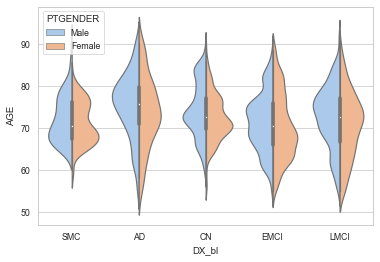

In [17]:
sns.set_context("paper")
sns.set_palette("pastel")
sns.violinplot(data=new_df, x='DX_bl', y="AGE", hue="PTGENDER", split=True, orient='v');

In [22]:
new_df.mask(new_df["MMSE"] < 25)


#sns.barplot(data=new_df, x="island", y="body_mass_g")

,RID,COLPROT_x,ORIGPROT,PTID,SITE,VISCODE_x,EXAMDATE_x,DX_bl,AGE,PTGENDER,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,update_stamp_y
0,5280.0,ADNI2,ADNI2,100_S_5280,100.0,m24,2015-09-29,SMC,67.5,Male,...,221030.0,221527.0,442558.0,248677.0,252440.0,501117.0,184081.0,626638.0,1066610.0,2019-11-14 14:34:09.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5273.0,ADNI2,ADNI2,135_S_5273,135.0,m24,2015-08-26,SMC,90.1,Male,...,177569.0,180288.0,357856.0,201824.0,191831.0,393655.0,146660.0,504516.0,873134.0,2019-11-14 14:34:09.0
3,5269.0,ADNI2,ADNI2,135_S_5269,135.0,m24,2015-09-01,SMC,64.9,Male,...,222718.0,222068.0,444786.0,259290.0,256581.0,515871.0,180442.0,625228.0,1074190.0,2019-11-14 14:34:09.0
4,5265.0,ADNI2,ADNI2,007_S_5265,7.0,m24,2015-08-25,SMC,75.1,Female,...,201099.0,200764.0,401864.0,201117.0,206964.0,408081.0,167202.0,569066.0,944838.0,2019-11-14 14:34:09.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,4021.0,ADNI2,ADNI2,031_S_4021,31.0,m06,2011-10-20,CN,66.5,Male,...,205069.0,200502.0,405571.0,243860.0,245900.0,489760.0,175430.0,581001.0,1039430.0,2019-11-14 14:34:03.0
3636,4021.0,ADNI2,ADNI2,031_S_4021,31.0,m12,2012-04-26,CN,66.5,Male,...,207328.0,205259.0,412587.0,243959.0,244867.0,488826.0,171803.0,584390.0,1040300.0,2019-11-14 14:34:03.0
3637,4021.0,ADNI2,ADNI2,031_S_4021,31.0,m24,2013-05-06,CN,66.5,Male,...,205436.0,204636.0,410072.0,241599.0,241353.0,482952.0,169834.0,579906.0,1034410.0,2019-11-14 14:34:03.0
3638,4021.0,ADNI2,ADNI2,031_S_4021,31.0,m36,2014-11-24,CN,66.5,Male,...,202993.0,200069.0,403062.0,238390.0,237651.0,476042.0,169108.0,572170.0,1023100.0,2019-11-14 14:34:03.0


In [54]:
new_df2 = new_df.copy()
new_df2["MMSE"] = np.where(new_df2["MMSE"] < 25, 1, 0)

<AxesSubplot:xlabel='DX_bl', ylabel='MMSE'>

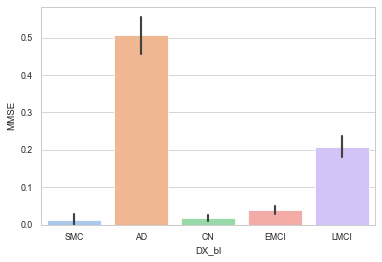

In [55]:
sns.barplot(data=new_df2, x='DX_bl', y="MMSE", orient="v")

<AxesSubplot:xlabel='DX_bl', ylabel='Probability'>

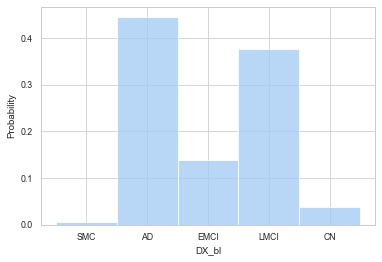

In [58]:
sns.histplot(data=new_df[new_df["MMSE"] < 25], x="DX_bl", stat='probability')

<AxesSubplot:xlabel='DX_bl', ylabel='Probability'>

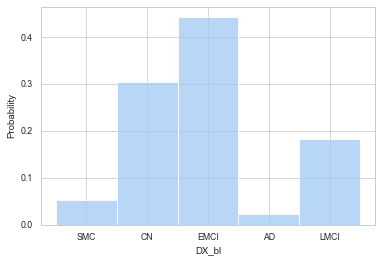

In [57]:
sns.histplot(data=new_df[new_df["MMSE"] >= 25], x="DX_bl", stat='probability')

## Basic predictor

In [3]:
demographics = pd.read_csv("../data/PTDEMOG.csv")
mmse = pd.read_csv("../data/MMSE.csv")
genetic = pd.read_csv("../data/APOERES.csv")
diagnostic = pd.read_csv('../data/DXSUM_PDXCONV_ADNIALL.csv')
adnimerge = pd.read_csv('../data/ADNIMERGE.csv')

C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (8,58,59,60,61,62,63,64,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (19,20,21,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
diagnostic.head()

,Phase,ID,RID,PTID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,...,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,DIAGNOSIS,update_stamp
0,ADNI1,2.0,2,011_S_0002,107,bl,bl,2005-10-01,NaN,2005-09-29,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2005-10-01 00:00:00.0
1,ADNI1,336.0,2,011_S_0002,107,m06,m06,2006-04-27,NaN,2006-03-06,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,2006-04-27 00:00:00.0
2,ADNI1,4.0,3,011_S_0003,107,bl,bl,2005-10-01,NaN,2005-09-30,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,2005-10-01 00:00:00.0
3,ADNI1,338.0,3,011_S_0003,107,m06,m06,2006-04-27,NaN,2006-03-13,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2006-04-27 00:00:00.0
4,ADNI1,990.0,3,011_S_0003,107,m12,m12,2006-09-14,NaN,2006-09-13,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2006-09-14 00:00:00.0


In [37]:
demographics.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,PTSOURCE,PTGENDER,...,PTTLANG,PTPLANG,PTPSPEC,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT,update_stamp
0,ADNI1,18,2,107,sc,sc,2005-08-17,NaN,1.0,1.0,...,1.0,1.0,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-08-17 00:00:00.0
1,ADNI1,20,1,10,f,f,2005-08-18,NaN,1.0,2.0,...,-4.0,-4.0,-4,NaN,NaN,-4.0,NaN,-4.0,-4.0,2005-08-18 00:00:00.0
2,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1.0,1.0,...,1.0,1.0,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0
3,ADNI1,24,4,10,sc,sc,2005-08-18,NaN,1.0,1.0,...,2.0,2.0,-4,NaN,NaN,-4.0,NaN,1.0,5.0,2005-08-18 00:00:00.0
4,ADNI1,26,5,107,sc,sc,2005-08-23,NaN,1.0,1.0,...,1.0,1.0,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-08-23 00:00:00.0


In [36]:
basic_data = pd.merge(diagnostic, demographics, how='inner', left_on=["RID", "VISCODE"], right_on=["RID", "VISCODE2"])
#basic_data = pd.merge(basic_data, genetic, how='inner', left_on=["RID", "VISCODE_x"], right_on=["RID", "VISCODE"])
#basic_data = pd.merge(basic_data, diagnostic, how='inner', left_on=["RID", "VISCODE_x"], right_on=["RID", "VISCODE2"])
#basic_data.head(10)
len(demographics)

4845

In [4]:
merge = pd.read_csv("../data/ADNIMERGE.csv", low_memory=False)

base = pd.concat([merge['AGE'], merge['PTGENDER'], merge['MMSE'], merge['APOE4'], merge['DX_bl']], axis=1)

gender_encoder = LabelEncoder()
new_gender= gender_encoder.fit_transform(base['PTGENDER'])
diagnostic = np.where(base['DX_bl'] == 'AD',1,0)

base['PTGENDER'] = new_gender
base['DX_bl'] = diagnostic

In [5]:
base = base.dropna()

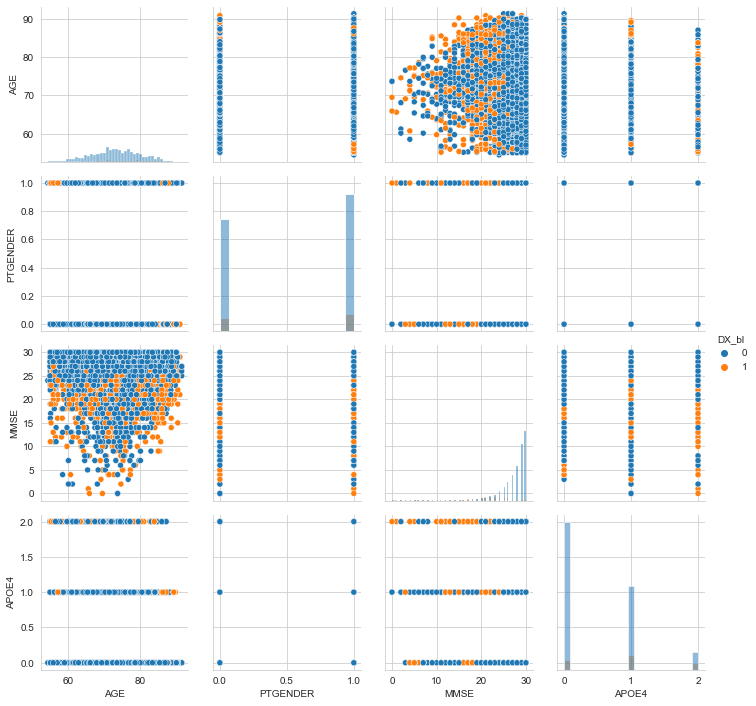

In [6]:
g = sns.PairGrid(base, hue="DX_bl")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [7]:

# Class count
count_class_0, count_class_1 = base.DX_bl.value_counts()

# Divide by class
df_class_0 = base[base['DX_bl'] == 0]
df_class_1 = base[base['DX_bl'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
base_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(base_under.DX_bl.value_counts())

#df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

Random under-sampling:
1    1204
0    1204
Name: DX_bl, dtype: int64


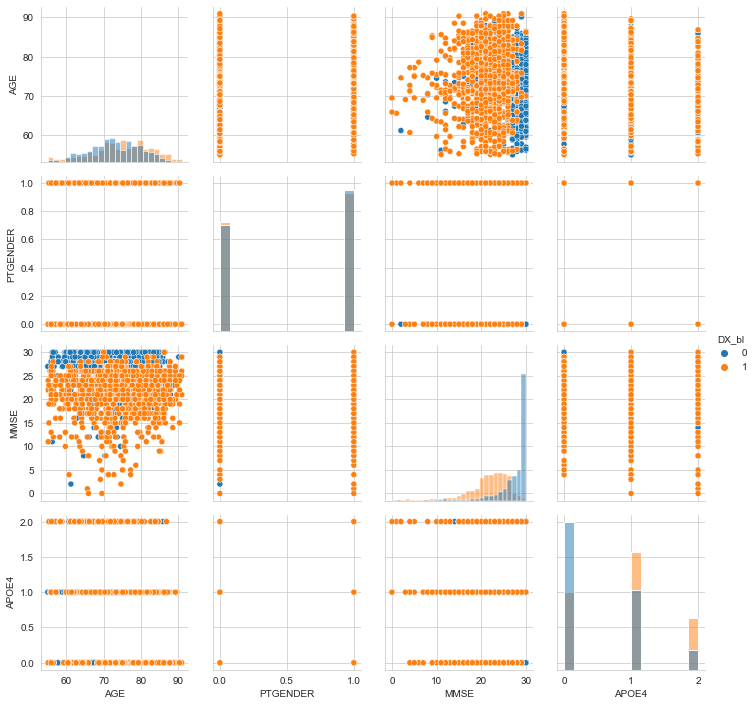

In [8]:
g = sns.PairGrid(base_under, hue="DX_bl")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [86]:
Y_under = base_under['DX_bl']
#base.drop(['DX_bl'])
base_under.drop(['DX_bl'], axis=1, inplace=True)

Y = base['DX_bl']
#base.drop(['DX_bl'])
base.drop(['DX_bl'], axis=1, inplace=True)


In [54]:
base

,AGE,PTGENDER,MMSE,APOE4
0,67.5,1,30.0,0.0
1,71.8,0,24.0,1.0
2,90.1,1,27.0,0.0
3,64.9,1,27.0,1.0
4,75.1,0,28.0,0.0
...,...,...,...,...
3635,66.5,1,30.0,0.0
3636,66.5,1,30.0,0.0
3637,66.5,1,29.0,0.0
3638,66.5,1,30.0,0.0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(base, Y, test_size=0.4, train_size=0.6)


In [88]:
gb = GradientBoostingClassifier()
gb.fit(base_under, Y_under)


GradientBoostingClassifier()

In [89]:
results = gb.predict(X_test)
x = zip(results, y_test)

In [90]:
counter = 0
total = 0
for (a,b) in x:
    total += 1
    counter += a==b

print("counter", counter)
print("total", total)

counter 3550
total 4440


In [92]:
3550/4440

0.7995495495495496

In [93]:
sklearn.metrics.confusion_matrix(y_test, results)

array([[3119,  857],
       [  33,  431]], dtype=int64)

In [62]:
len(Y[Y==1])

1204

In [94]:
balanced_accuracy_score(y_test, results)

0.8566680253937418

In [68]:
rus = RandomUnderSampler()
X_rus, y_rus, id_rus = rus.fit_sample(X_test, y_test)

AttributeError: 'RandomUnderSampler' object has no attribute 'fit_sample'

## Basic MCI -> Alzheimer predictor

In [8]:
merge.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2022-10-26 04:58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2022-10-26 04:58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2022-10-26 04:58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2022-10-26 04:58:48.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2022-10-26 04:58:48.0


In [9]:
merge = pd.read_csv("../data/ADNIMERGE.csv", low_memory=False)

base_pred = pd.concat([merge['PTID'], merge['AGE'], merge['PTGENDER'], merge['MMSE'], merge['APOE4'], merge['DX_bl']], axis=1)



In [60]:

firstvisits = ~base_pred.duplicated(subset=['PTID'])
lastvisits = ~base_pred.duplicated(subset=['PTID'], keep='last')
#base_pred = pd.concat([merge['PTID'], merge['AGE'], merge['PTGENDER'], merge['MMSE'], merge['APOE4'], merge['DX_bl'], firstvisits, lastvisits], axis=1)
first = base_pred.loc[firstvisits]
last = base_pred.loc[lastvisits]


last =  pd.concat([last['PTID'], last['DX_bl']],axis=1)
first.loc['PTID'] = first['PTID'].astype(str)
last.loc['PTID'] = last['PTID'].astype(str)
first.join(last, on='PTID', how='inner', lsuffix='_left', rsuffix='_right')



C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,PTID,PTID_left,AGE,PTGENDER,MMSE,APOE4,DX_bl_left,PTID_right,DX_bl_right


In [59]:
first

,PTID,AGE,PTGENDER,MMSE,APOE4,DX_bl
0,011_S_0002,74.3,Male,28.0,0.0,CN
1,011_S_0003,81.3,Male,20.0,1.0,AD
5,022_S_0004,67.5,Male,27.0,0.0,LMCI
10,011_S_0005,73.7,Male,29.0,0.0,CN
15,100_S_0006,80.4,Female,25.0,0.0,LMCI
...,...,...,...,...,...,...
16179,016_S_6892,65.6,Female,24.0,NaN,SMC
16183,035_S_7076,62.8,Female,30.0,NaN,SMC
16193,011_S_7089,65.7,Female,30.0,NaN,SMC
16203,035_S_7105,77.5,Female,24.0,NaN,LMCI


In [49]:
last.head()

,PTID,DX_bl
63,067_S_0038,LMCI
76,100_S_5280,SMC
77,082_S_5279,SMC
131,099_S_0060,LMCI
208,018_S_0087,LMCI


In [ ]:
gender_encoder = LabelEncoder()
new_gender= gender_encoder.fit_transform(base_pred['PTGENDER'])
diagnostic = np.where(base['DX_bl'] == 'AD',1,0)

base['PTGENDER'] = new_gender